# 1 Genetic Algorithm

A genetic algorithm is a method (search heuristic) inspired by natural evolution. The algorithm reflects the process of natural selection – the fittest individuals are selected for reproduction in order to produce offsprings of the next generation.

*Source:* [towardsdatascience.com](https://towardsdatascience.com/introduction-to-genetic-algorithms-including-example-code-e396e98d8bf3)

In the following report, we use the genetic algorithm to solve the **construction form** of the **Knapsack problem**. The description of the problem can be found [here](https://moodle-vyuka.cvut.cz/mod/page/view.php?id=89694).

## 1.1 Author of Report

* **Name:** Tomáš Patro
* **Username:** patrotom
* **Email:** patrotom@fit.cvut.cz

## 1.2 Algorithm Structure

In this section, we will briefly describe the base structure of the genetic algorithm we used in this report:

``` python
def genetic():
    prev_gen = init_generation()
    solution.append(prev_gen)

    for it in range(0, gen_num):
        gen = []

        gen.append(find_elite(prev_gen))
        while len(gen) < len(prev_gen):
            parents = tournament(prev_gen)
            offsprings = crossover(parents)
            offsprings = mutate(offsprings)
            gen += offsprings

        prev_gen = gen
        solution.append(prev_gen)
```

First, we start by initializing the first generation. The first generation is initialized by generating random configurations of the Knapsack problem. A particular instance determines the number of items, and the number of random configurations corresponds to the given population size. We add the first generation to the solution.

The number of `for` loop iterations corresponds to the given number of generations. In each iteration of the loop, we generate a new generation. First, we add the fittest individual from the previous generation to the next generation – we call this **elitism**. The generating is done in the nested `while` loop, which iterates until the whole population is generated (the number of individuals in all generations is the same). The generating consists of these three phases:

1. Selection (tournament)
2. Crossover (two-point)
3. Mutation (binary)

### 1.2.1 Selection

In the first phase, we select two individuals for reproduction. We use the **tournament** strategy for this purpose. In this strategy, we take two samples of randomly selected five individuals. We take two fittest individuals from each sample. Again, we put these four individuals together and take the first two fittest, which become new parents.

The fitness function is calculated as follows:

* $n$ – number of items
* $c_i$ – $1$ if item is in knapsack, $0$ otherwise
* $v_i$ – value of $i$th item
* $w_i$ – weight of $i$th item
* $M$ – knapsack capacity

$$fitness = \sum_{i=1}^{n} c_iv_i; if \sum_{i=1}^{n} c_iw_i \leq M$$
$$fitness = 0; otherwise$$

### 1.2.2 Crossover

The selected parents undergo the crossover with the given probability. If the parents do not undergo crossover, they are copied to the next generation. For the crossover, we use the **two-point** strategy. Individuals are split at two random points and recombined. The result of the crossover is two new offsprings (might be the same as parents).

### 1.2.3 Mutation

Each offspring undergo the mutation with the given probability. For the mutation, we use the **binary** strategy. It means that we flip one random bit in the offsprings' configuration.

# 2 Results Analysis

In the following section, we look at the results the algorithm gives us. We will experiment with different algorithm settings to see how it affects the overall result. We will be adjusting these settings (parameters):

* $p$ – population size (`int`)
* $g$ – number of generations (`int`)
* $c$ – crossover probability ($c \in [0,1]$)
* $m$ – mutation probability ($m \in [0,1]$)

We save the average and the maximum fitness from each generation. We use this to demonstrate the behavior of the algorithm.

For the purpose of this report, we use the following Knapsack problem instance:

* $n = 40$
* $M = 2015$
* $w = \{12, 99, 81, 62, 172, 61, 74, 133, 70, 47, 140, 166, 169, 195, 146, 119, 196, 188, 16, 195, 216, 72, 239, 11, 110, 144, 7, 118, 75, 183, 249, 95, 48, 144, 153, 5, 137, 1, 160, 32\}$
* $v = \{783, 427, 164, 1349, 40, 1864, 360, 2343, 578, 397, 1302, 1000, 1625, 1672, 972, 1104, 1865, 1799, 666, 15, 39, 739, 975, 179, 1930, 780, 1232, 1743, 385, 725, 1637, 5, 2165, 1884, 106, 543, 1104, 1674, 1531, 1838\}$

The optimal price of this configuration is $OP = 31840$.

We analyze the data using the *Python* language and its mathematical modules. The graphs and the whole report are rendered in the *Jupyter Notebook* – that's why we also add the code snippets in this report, which process data and generate the graphs.

In the graphs below, the optimal price is indicated by the **green, dashed** line.

In [1]:
import sys
import os
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import numpy as np
import matplotlib.pyplot as plt

from genetic import Genetic
from lib.instance import Instance
from lib.item import Item

In [82]:
size = 40
capacity = 2015
opt_price = 31840
data = [12, 783, 99, 427, 81, 164, 62, 1349, 172, 40, 61, 1864, 74, 360, 133, 2343, 70, 578, 47, 397, 140, 1302, 166, 1000, 169, 1625, 195, 1672, 146, 972, 119, 1104, 196, 1865, 188, 1799, 16, 666, 195, 15, 216, 39, 72, 739, 239, 975, 11, 179, 110, 1930, 144, 780, 7, 1232, 118, 1743, 75, 385, 183, 725, 249, 1637, 95, 5, 48, 2165, 144, 1884, 153, 106, 5, 543, 137, 1104, 1, 1674, 160, 1531, 32, 1838]

items = []
for i in range(0, len(data), 2):
    item = Item(data[i], data[i+1])
    items.append(item)

inst = Instance(size, capacity, items, opt_price)

In [60]:
# Helper functions and configuration

plt.rcParams['figure.figsize'] = (16, 9)

def genetic_plot(opts):
    gen = Genetic(inst, opts)
    gen.run()
    data = gen.sol.gen_data
    ex_time = "{:.2f}".format(gen.sol.time * 1000)
    rel_err = "{:.2f}".format(gen.sol.rel_err * 100)

    print(f"Relative error: {rel_err} %")
    print(f"Execution time: {ex_time} ms")
    print(f"Maximum price (fitness): {gen.sol.price}")
    print(f"Optimal price (fitness): {opt_price}")

    xs = list(range(opts["g"] + 1))
    plt.plot(xs, data["max"], color="red", label="max")
    plt.plot(xs, data["mean"], color="blue", label="avg")
    plt.plot(xs, [opt_price] * (opts["g"] + 1), color="green", label="opt", linestyle="--")
    plt.ylim(top=35000)
    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    plt.legend()
    plt.show()

Let's start with some initial values and see how the population will evolve:

Relative error: 28.30 %
Execution time: 209.29 ms
Maximum price (fitness): 22830
Optimal price (fitness): 31840


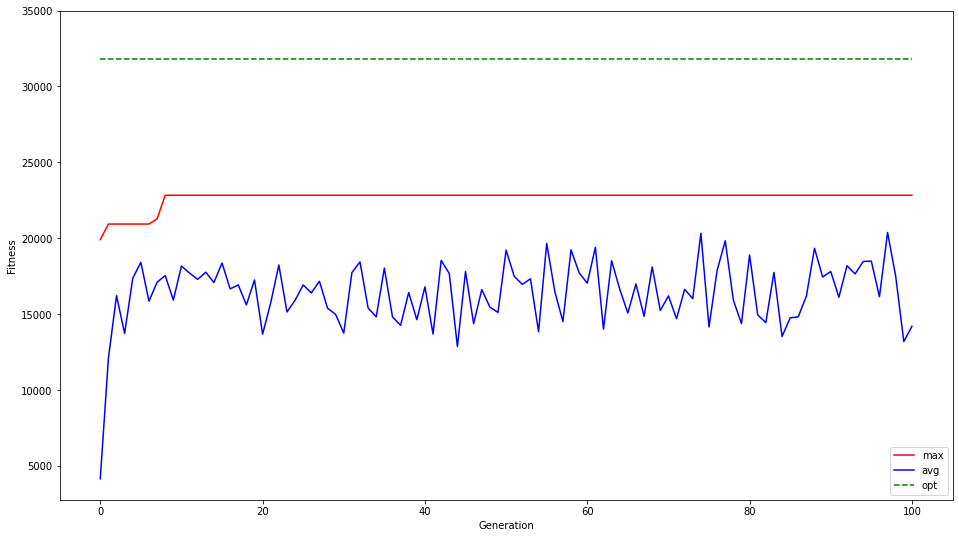

In [62]:
opts = {"p": 50, "g": 100, "c": 0.5, "m": 0.0}
genetic_plot(opts)

We can see that the population got stuck in the local maximum quite quickly. We can also note that the relative error is $28.30\%$. That is quite a lot. Let's see what would happen if we try to increase the population size and number of generations:

Relative error: 9.86 %
Execution time: 2346.63 ms
Maximum price (fitness): 28701
Optimal price (fitness): 31840


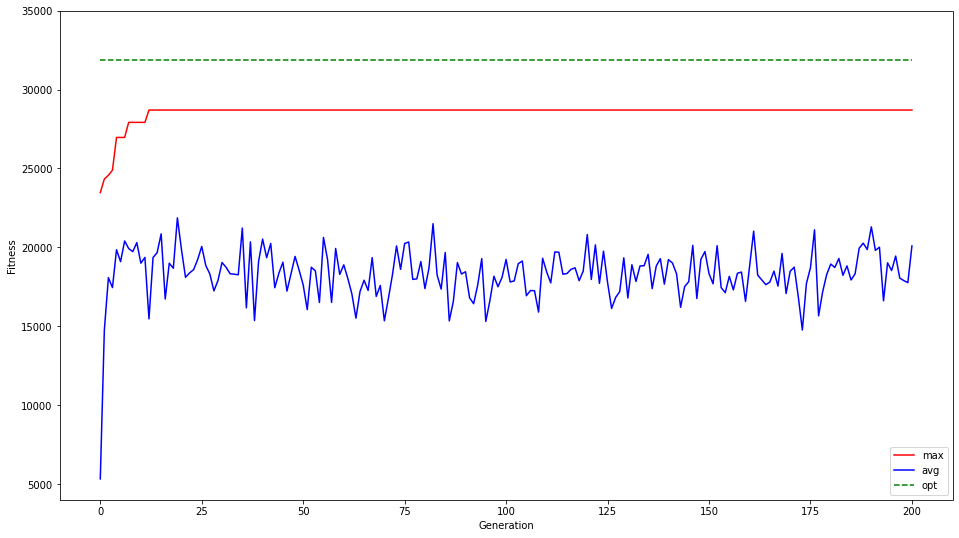

In [63]:
opts = {"p": 200, "g": 200, "c": 0.5, "m": 0.0}
genetic_plot(opts)

Increasing the population size and the number of generations positively affected the relative error and maximum price. We were able to decrease the relative error to $9.36\%$. However, we also increased the execution time. Let's try to use the values from the first graph and increase the crossover probability:

Relative error: 5.49 %
Execution time: 146.99 ms
Maximum price (fitness): 30093
Optimal price (fitness): 31840


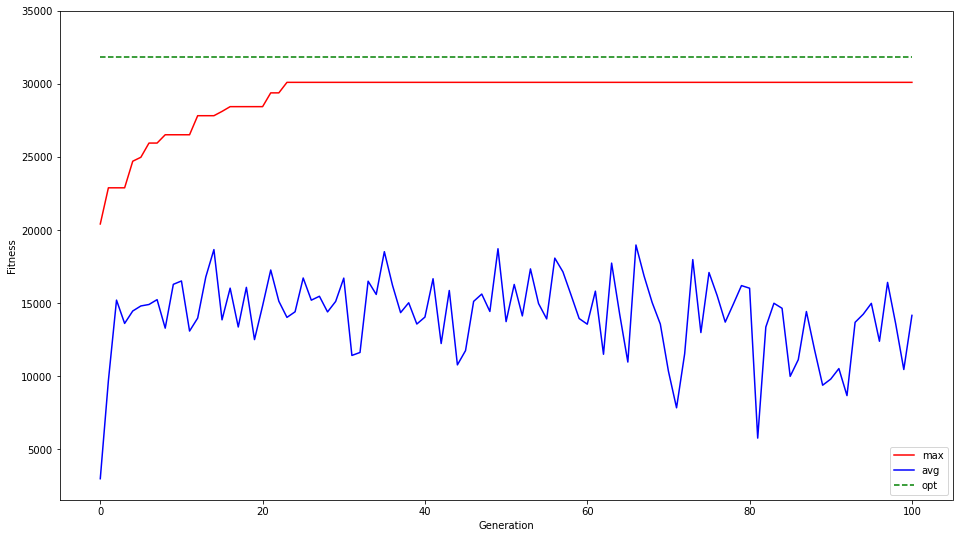

In [75]:
opts = {"p": 50, "g": 100, "c": 0.99, "m": 0.0}
genetic_plot(opts)

We can observe an interesting behavior from the graph above. The maximum price is closer to the optimal price than in the previous examples. The relative error thus decreased to the value of $5.49\%$. We also reduced the execution time. The interesting fact, on the other hand, is that the average fitness is quite low. We can conclude that the population consists of a few strong individuals who produce strong offsprings and the majority of weaker individuals.

The higher crossover probability gives us good results. Let's take these settings and try to introduce some mutation into the population:

Relative error: 3.54 %
Execution time: 164.65 ms
Maximum price (fitness): 30714
Optimal price (fitness): 31840


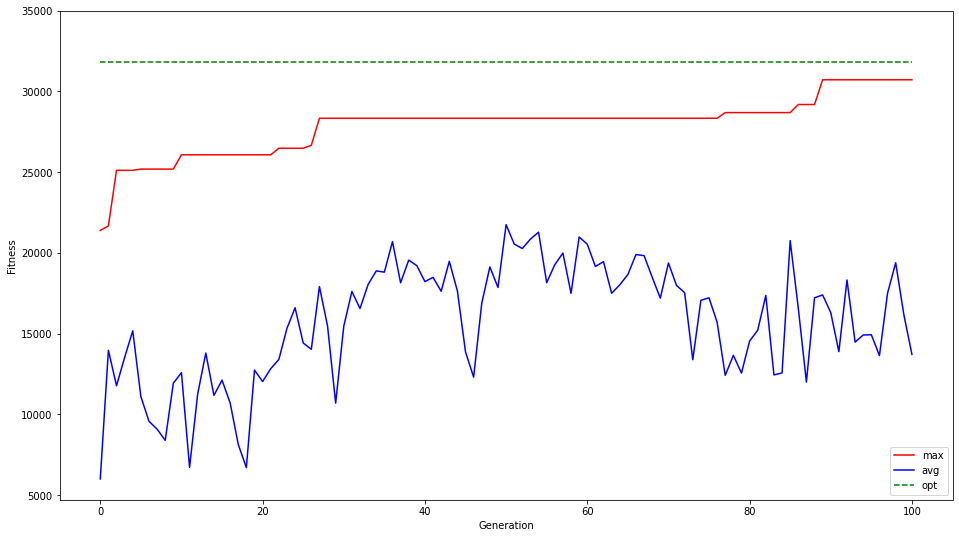

In [76]:
opts = {"p": 50, "g": 100, "c": 0.99, "m": 0.1}
genetic_plot(opts)

We can observe that the mutation introduced randomness into evolution. It enabled us to escape from the local maximums and increase the maximum price and decrease the relative error up to $3.54\%$. Let's try to take these settings and increase the size of the population and number of generations:

Relative error: 1.88 %
Execution time: 1225.29 ms
Maximum price (fitness): 31242
Optimal price (fitness): 31840


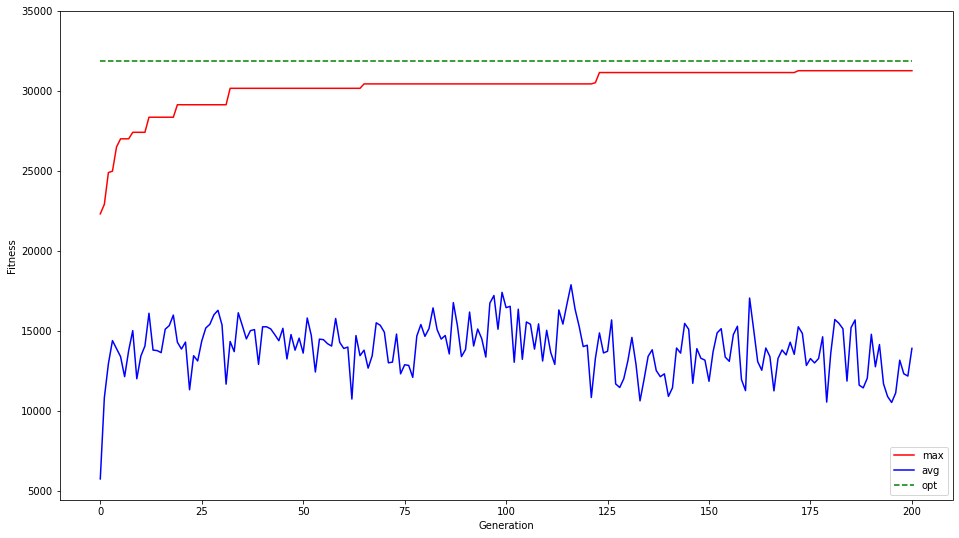

In [81]:
opts = {"p": 200, "g": 200, "c": 0.99, "m": 0.1}
genetic_plot(opts)

From the graph above, we can see that by combining a large population, more generations, crossover, and mutation, we were able to converge to a quite good solution. We decreased the relative error up to $1.88\%$. However, we slightly increased the execution time. Mainly because of the more generations and a larger population.

# 3 Conclusion

First, we explained the nature of the genetic algorithm and its connection with the Theory of evolution. We also described the basic structure of the algorithm we used in this report. We added the description of the used genetic mechanisms and briefly explained them (selection, crossover, mutation).

In the second part, we analyzed how the algorithm behaves using different settings. We tried to demonstrate how the settings affect the algorithm's performance and how we can improve it by tuning the settings.

We can conclude that the genetic algorithm is a quite good heuristic for the given instance, which can be tuned to give us an almost optimal solution and low relative error.